# Data validation
In this notebook we investigate data completeness and correctness. 

## Inspecting the data
Below we import the training data and produce some preliminary summaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv('../data/training_features.csv', index_col='id')
targets = pd.read_csv('../data/training_labels.csv', index_col='id')
df = features.join(targets, how='left')
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

None

In [4]:
display(df.isnull().sum())

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [5]:
display(df.describe())

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


## Data classification
In this section we us the provided [Data Summary](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/) classify variables.

### Geographical data
There are several variables that describe the geography of waterpoints. These variables fall into two subclasses.

#### Quantitative
The variables below provide geo-spatial coordinates for the waterpoint.
* `longitude` - GPS coordinate. Valid values fall in the interval [29.6, 40.4].
* `latitude` - GPS coordinate. Valid values fall in the interval [-11.7, -0.8].
* `gps_height` - Altitude of the well. Valid values fall in the interval [0, 5895] meters.

#### Qualitative
The variables below provide a categorical description of waterpont location.
* `region` (`region_code`)  - Names (codes) for top-level administrative regions. There are 31 total [Link](https://en.wikipedia.org/wiki/Regions_of_Tanzania)
* `lga` (`district_code`) - Names (codes) for districts, which divide regions.
* `ward` - Names for wards, which divide districts.
* `subvillage` - Names for sub-villages, presumably these subdivide wards. 

### Water Table
* `basin` - Geographic water basin
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water

### Waterpoint
* `wpt_name` - Name of the waterpoint if there is one
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint
* `population` - Population around the well

### Waterpoint Management
* `scheme_management` Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs

### Waterpoint Installation
* `construction_year` - Year the waterpoint was constructed
* `funder` - Who funded the well
* `installer` - Organization that installed the well

### Data collection
* `date_recorded` - The date the row was entered
* `recorded_by` - Group entering this row of data

### Unknown
* `num_private` -
* `public_meeting` - True/False

## Inspecting Geographical Data

### Quantitative
The variables below provide geo-spatial coordinates for the waterpoint.
* `longitude` - GPS coordinate. Valid values fall in the interval [29.6, 40.4].
* `latitude` - GPS coordinate. Valid values fall in the interval [-11.7, -0.8].
* `gps_height` - Altitude of the well. Valid values fall in the interval [0, 5895] meters.
Below we map a random sample of 500 waterpoints.

In [6]:
quantGeo = df[['longitude', 'latitude', 'gps_height', 'status_group']]
index_sample = list(np.random.choice(quantGeo.index, 500, replace=False))
sample = quantGeo.loc[index_sample]


In [7]:
import folium

lat =  -6.3728
long = 34.8925

#Create a map of the area
base_map = folium.Map([lat, long], zoom_start=6)

In [8]:
color_dict = {
    'functional' : 'green',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

for index in sample.index:
        lat = sample['latitude'][index]
        long = sample['longitude'][index]
        status = str(sample['status_group'][index])
        color = color_dict[status]
        marker = folium.Circle(location=[lat, long], radius=1, popup=[lat, long], color=color)
        marker.add_to(base_map)

In [9]:
base_map

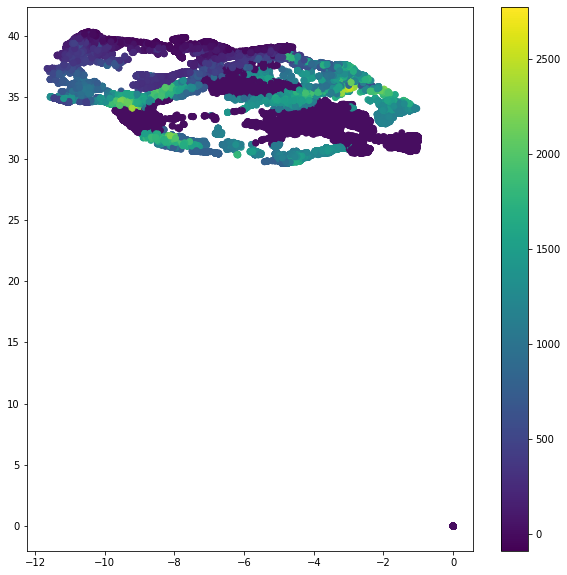

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x='latitude', y='longitude', c='gps_height', data=quantGeo)
plt.colorbar()

#### Conclusions
There are a handful of waterpoints with bad `latitude` and `longitude`, there are also some waterpoints with negative `gps_height`.

### Qualitative 
The variables below provide a categorical description of waterpont location.
* `region` (`region_code`)  - Names (codes) for top-level administrative regions. There are 31 total [Link](https://en.wikipedia.org/wiki/Regions_of_Tanzania)
* `lga` (`district_code`) - Names (codes) for districts, which divide regions.
* `ward` - Names for wards, which divide districts.
* `subvillage` - Names for sub-villages, presumably these subdivide wards. 

In [11]:
qualGeo = df[['region', 'region_code', 'lga', 'district_code', 'ward', 'subvillage', 'status_group', 'wpt_name']]
qualGeo.groupby(by=['region', 'region_code', 'lga', 'district_code', 'ward', 'subvillage', 'status_group']).count()

wpt_name
region region_code lga          district_code ward    subvillage status_group                     
Arusha 2           Arusha Rural 2             Bangata Engikaleti functional                     14
                                                                 non functional                  5
                                                      Gwasei     non functional                  1
                                                      Kwaniche   functional                      2
                                                                 functional needs repair         2
...                                                                                            ...
Tanga  5           Kilindi      1             Kikunde Morogoro   functional                      1
                                                      Rebenya    functional                      2
                                                      Temeke A   functional                      1
                                                      Ungulodi   functional                      1
                                                      Walambe    functional                      1

[34170 rows x 1 columns]

In [12]:
qualGeo = df[['region', 'lga', 'ward', 'subvillage', 'wpt_name']]
qualGeo.groupby(by=['region', 'lga', 'ward', 'subvillage']).count()

wpt_name
region lga          ward    subvillage          
Arusha Arusha Rural Bangata Engikaleti        19
                            Gwasei             1
                            Kwaniche           5
                            Lobolosi           1
                            Ndukenyi           2
...                                          ...
Tanga  Tanga        Tongoni Mundura            3
                            Mwarongo           9
                            Tambarani          1
                            Tambarare          1
                            Tongoni            3

[27481 rows x 1 columns]

### Conclusions
* Both `region_code` and `district_code` seem to be non-standard encodings and should probably be dropped.
* `lga` provides the names of districts.
* `ward` and `subvillage` have a huge number of values.

### Inspecting Water Table Data
* `basin` - Geographic water basin
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water

In [13]:
waterQuality = df[['quality_group', 'water_quality', 'status_group', 'wpt_name']]
waterQuality.groupby(by=['quality_group', 'water_quality', 'status_group']).count()

wpt_name
quality_group water_quality      status_group                     
colored       coloured           functional                    246
                                 functional needs repair        54
                                 non functional                190
fluoride      fluoride           functional                    151
                                 functional needs repair        13
                                 non functional                 36
              fluoride abandoned functional                      6
                                 non functional                 11
good          soft               functional                  28760
                                 functional needs repair      3904
                                 non functional              18154
milky         milky              functional                    438
                                 functional needs repair        14
                                 non functional                352
salty         salty              functional                   2220
                                 functional needs repair       225
                                 non functional               2411
              salty abandoned    functional                    174
                                 functional needs repair        72
                                 non functional                 93
unknown       unknown            functional                    264
                                 functional needs repair        35
                                 non functional               1577

In [14]:
waterQuantity = df[['quantity_group', 'quantity', 'status_group', 'wpt_name']]
waterQuantity.groupby(by=['quantity_group', 'quantity', 'status_group']).count()

wpt_name
quantity_group quantity     status_group                     
dry            dry          functional                    157
                            functional needs repair        37
                            non functional               6052
enough         enough       functional                  21648
                            functional needs repair      2400
                            non functional               9138
insufficient   insufficient functional                   7916
                            functional needs repair      1450
                            non functional               5763
seasonal       seasonal     functional                   2325
                            functional needs repair       416
                            non functional               1309
unknown        unknown      functional                    213
                            functional needs repair        14
                            non functional                562

In [15]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [16]:
waterSource = df[['source_class', 'source_type', 'source', 'status_group', 'wpt_name']]
waterSource.groupby(by=['source_class', 'source_type', 'source', 'status_group']).count()

wpt_name
source_class source_type          source               status_group                     
groundwater  borehole             hand dtw             functional                    497
                                                       functional needs repair        17
                                                       non functional                360
                                  machine dbh          functional                   5422
                                                       functional needs repair       491
                                                       non functional               5162
             shallow well         shallow well         functional                   8324
                                                       functional needs repair       957
                                                       non functional               7543
             spring               spring               functional                  10592
                                                       functional needs repair      1276
                                                       non functional               5153
surface      dam                  dam                  functional                    253
                                                       functional needs repair        24
                                                       non functional                379
             rainwater harvesting rainwater harvesting functional                   1386
                                                       functional needs repair       314
                                                       non functional                595
             river/lake           lake                 functional                    162
                                                       functional needs repair        12
                                                       non functional                591
                                  river                functional                   5465
                                                       functional needs repair      1221
                                                       non functional               2926
unknown      other                other                functional                    126
                                                       functional needs repair         1
                                                       non functional                 85
                                  unknown              functional                     32
                                                       functional needs repair         4
                                                       non functional                 30

#### Conclusions
* `water_quality` provides information about whether a waterpoint is abandoned.
* `quantity` and `quantity_group` are duplicate columns.
* `source_class`, `source_type`, and `source` all provide essentially the same data. `source_class` seems like the best variable for initial investigation.

## Inspecting Waterpoint Data
* `wpt_name` - Name of the waterpoint if there is one
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint
* `population` - Population around the well

In [17]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [18]:
df[['extraction_type_group', 'extraction_type_class', 'extraction_type']].value_counts()

extraction_type_group  extraction_type_class  extraction_type          
gravity                gravity                gravity                      26780
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
submersible            submersible            submersible                   4764
swn 80                 handpump               swn 80                        3670
mono                   motorpump              mono                          2865
india mark ii          handpump               india mark ii                 2400
afridev                handpump               afridev                       1770
submersible            submersible            ksb                           1415
rope pump              rope pump              other - rope pump              451
other handpump         handpump               other - swn 81                 229
wind-powered           wind-powered  

In [19]:
df[['waterpoint_type_group', 'waterpoint_type']].value_counts()

waterpoint_type_group  waterpoint_type            
communal standpipe     communal standpipe             28522
hand pump              hand pump                      17488
other                  other                           6380
communal standpipe     communal standpipe multiple     6103
improved spring        improved spring                  784
cattle trough          cattle trough                    116
dam                    dam                                7
dtype: int64

In [20]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

<AxesSubplot:>

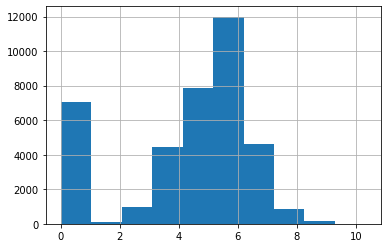

In [21]:
df[df['population']>0]['population'].apply(lambda x: np.log(x)).hist()

#### Conclusions
* `amount_tsh` has a large number of zero values. It is hard to say if these represent missing values. Non-zero values would most likely benefit from log transform. 
* `extraction_type_class` seems to provide a good classification of pumps. Both `extraction_type_group` and `extraction_type` seem to be a mixture of models and types that is unlikely to provide much insight.
* `waterpoint_type_group` and `waterpoint_type` are essentially duplicate columns. I prefer the terminology used in `waterpoint_type_group`.
* `population` seems to use zero as a placeholder for missing values. Non-zero values might benefit from a log transformation.

## Inspecting Waterpoint Management Data
* `scheme_management` Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs

In [22]:
df[['scheme_management', 'scheme_name', 'status_group', 'wpt_name']].groupby(by=['scheme_management', 'scheme_name', 'status_group']).count()

wpt_name
scheme_management scheme_name              status_group                     
Company           BFFS                     non functional                  1
                  Bagamoyo Wate            functional                     47
                                           non functional                 13
                  Bagamoyo wate            functional                    150
                                           non functional                 60
...                                                                      ...
Water authority   no scheme                functional                      5
                                           functional needs repair         1
                                           non functional                  3
                  pump                     non functional                  2
                  water supply at Kalebejo non functional                  1

[4630 rows x 1 columns]

In [23]:
df['scheme_name'].value_counts()

K                                     682
None                                  644
Borehole                              546
Chalinze wate                         405
M                                     400
                                     ... 
Halmashauri                             1
Kakonko Mbizi gravity water supply      1
Lutindi water supply                    1
Kubi                                    1
improved                                1
Name: scheme_name, Length: 2696, dtype: int64

In [24]:
df[['management_group', 'management', 'status_group', 'wpt_name']].groupby(by=['management_group', 'management', 'status_group']).count()

wpt_name
management_group management       status_group                     
commercial       company          functional                    267
                                  functional needs repair        15
                                  non functional                403
                 private operator functional                   1476
                                  functional needs repair        44
                                  non functional                451
                 trust            functional                     46
                                  functional needs repair         6
                                  non functional                 26
                 water authority  functional                    446
                                  functional needs repair        52
                                  non functional                406
other            other            functional                    505
                                  functional needs repair        55
                                  non functional                284
                 other - school   functional                     23
                                  functional needs repair         1
                                  non functional                 75
parastatal       parastatal       functional                   1020
                                  functional needs repair       211
                                  non functional                537
unknown          unknown          functional                    224
                                  functional needs repair        27
                                  non functional                310
user-group       vwc              functional                  20425
                                  functional needs repair      2791
                                  non functional              17291
                 water board      functional                   2170
                                  functional needs repair       265
                                  non functional                498
                 wua              functional                   1751
                                  functional needs repair       205
                                  non functional                579
                 wug              functional                   3906
                                  functional needs repair       645
                                  non functional               1964

In [25]:
df[['payment_type', 'payment']].value_counts()

payment_type  payment              
never pay     never pay                25348
per bucket    pay per bucket            8985
monthly       pay monthly               8300
unknown       unknown                   8157
on failure    pay when scheme fails     3914
annually      pay annually              3642
other         other                     1054
dtype: int64

### Conclusions
* `scheme_name` seems to be describing the particular entity in charge of managing the waterpoint. This data may be overly granular.
* `scheme_management` describes the type of entity that manages the waterpoint.
* `management_group` and `management` seem to also describe management of the waterpoint. This representation seems to me better designed.
* `payment_type` and `payment` are duplicate columns with `payment` having the more descriptive labels.

## Inspecting Waterpoint Installation Data
* `construction_year` - Year the waterpoint was constructed
* `funder` - Who funded the well
* `installer` - Organization that installed the well

In [26]:
df[['construction_year']].value_counts()

construction_year
0                    20709
2010                  2645
2008                  2613
2009                  2533
2000                  2091
2007                  1587
2006                  1471
2003                  1286
2011                  1256
2004                  1123
2012                  1084
2002                  1075
1978                  1037
1995                  1014
2005                  1011
1999                   979
1998                   966
1990                   954
1985                   945
1980                   811
1996                   811
1984                   779
1982                   744
1994                   738
1972                   708
1974                   676
1997                   644
1992                   640
1993                   608
2001                   540
1988                   521
1983                   488
1975                   437
1986                   434
1976                   414
1970                   411
1991      

In [27]:
df[['funder']].value_counts()

funder                
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Mwanamisi Ally               1
Mwanza                       1
Mwingereza                   1
Mwinjuma Mzee                1
Mganga                       1
Length: 1897, dtype: int64

In [28]:
df[['installer']].value_counts()

installer       
DWE                 17402
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
Mwakabalula             1
Mwalimu  Muhenza        1
Mwalimu  Muhenzi        1
Mwamama                 1
Magani                  1
Length: 2145, dtype: int64

### Conclusions 
* zero seems to be a placeholder for missing values in the `construction_year` column.
* Both `installer` and `funder` have a huge number of labels. 

# Target class imbalance

In [31]:
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

# Overall Conclusions
* There are a small number of incorrect gps locations. These should be cleaned.
* the variables `region`, `lga`, `ward`, and `subvillage` provide a hierarchical description of the location of waterpoints.
* `region_code` and `district_code` should be dropped.
* `quantity_group` duplicates `quantity` and should be dropped.
* `quality_group` provides information about the quality of the water.
* `water_quality` could be engineered into a boolean `is_abandoned` variable.
* Keep `source_class`. Drop `source_type` and `source`.
* `amount_tsh` has a large number of zero values. It is hard to say if these represent missing values. Non-zero values would most likely benefit from log transform. 
* `extraction_type_class` seems to provide a good classification of pumps. Both `extraction_type_group` and `extraction_type` seem to be a mixture of pump models and types that is unlikely to provide much insight.
* `waterpoint_type_group` and `waterpoint_type` are essentially duplicate columns. I prefer the terminology used in `waterpoint_type_group`.
* `population` seems to use zero as a placeholder for missing values. Non-zero values might benefit from a log transformation.
* `scheme_name` seems to be describing the particular entity in charge of managing the waterpoint. This data may be overly granular.
* `scheme_management` describes the type of entity that manages the waterpoint.
* `management_group` and `management` seem to also describe management of the waterpoint. This representation seems to me better designed.
* `payment_type` and `payment` are duplicate columns with `payment` having the more descriptive labels.
* zero seems to be a placeholder for missing values in the `construction_year` column.
* Both `installer` and `funder` have a huge number of labels. 

## Drop
* `region_code`
* `district_code`
* `quantity_group`
* `water_quality` (or engineer into `is_abandoned`)
* `source_type`
* `source`
* `extraction_type_group`
* `extraction_type`
* `waterpoint_type`
* `scheme_name` (high dimensionality will require engineering otherwise)
* `scheme_management` (better represented in `management_group` and `management`)
* `payment_type`
* `installer` (high dimensionality will require engineering otherwise)
* `funder` (high dimensionality will require engineering otherwise)

